<a href="https://colab.research.google.com/github/AliMahdavifar/Gaussian_Mixture_Model/blob/main/Project_2_Ali_Mahdavifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**, APS1070 Fall 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model**

*   Name: **Ali Mahdavifar**

##**Part 1: Getting started** [4 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **[0.25]**

> ***284807 rows*** 

* What features in the dataset are present aside from the 28 main features? **[0.25]**


> ***Amount and Class***


* Which column contains the targets?  **[0.25]**


> ***Class***


* To what do the target values correspond?  **[0.25]**


> ***binary classification of fruad (class 1) vs. legal (class 0) trasactions***



In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=ad22f485ab7bc642c63db2e06e6a5384359a7b3c1dd1d4be15584bbabdd75e96
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
print("The data frame has " , df.shape[0], " rows.")
df

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? **[0.5]**

> ***99.83% of entries are legal (class 0) and 0.17% of entries are fraud (class 1)***

* Is this data considered balanced or unbalanced? Why is this the case?**[0.5]**


> ***This is an imbalanced dataset, because the number of positive fraud cases is very rare and disproportional companred to legal cases.***


* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **[0.5]**


> ***The problem is due to having a very small percentage of the training data being fraud, our kNN model can falsely give a high percentage accuracy for this dataset. When we present new cases to the model, most likely its success rate will be much lower. The model is overfitted to the imbalanced dataset we used to train it and it does not capture anything such as precision or recall in its training.***





In [ ]:
is_fraud = df['Class'] == 1
fraud_p = (df[is_fraud].shape[0] / df.shape[0]) * 100
print("%.2f %% of entries are legal (class 0)" %(100 - fraud_p))
print("%.2f %% of entries are fraud (class 1)" %(fraud_p))



99.83 % of entries are legal (class 0)
0.17 % of entries are fraud (class 1)


Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V20? Make sure to only use your training set for this calculation. **[0.5]**


> ***Mean for feature V20 is  0.0004302219382028674 and Standard deviation for feature V20 is  0.7702555243469442***



Use the code below to set up a Gaussian object for V20.

In [ ]:
# SPLIT THE DATASET INTRO TRAINING AND TEST
from sklearn.model_selection import train_test_split
time = df['Time']
y_true = df.iloc[:,-1]
X = df.iloc[:,1:-2]
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.3, random_state = 0)


In [ ]:
X_train[y_train == 0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471


In [ ]:
# CREATE GAUSSIAN DISTRIBUTION OBJECT FOR V20
from scipy import stats

train_mean = np.mean(X_train['V20'])
train_std = np.std(X_train['V20'])

print("Mean for feature V20 is ", train_mean)
print("Standard deviation for feature V20 is ", train_std)

norm = stats.norm(loc = train_mean, scale = train_std)

Mean for feature V20 is  0.0004302219382028674
Standard deviation for feature V20 is  0.7702555243469442


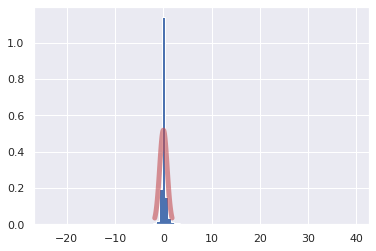

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V20'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

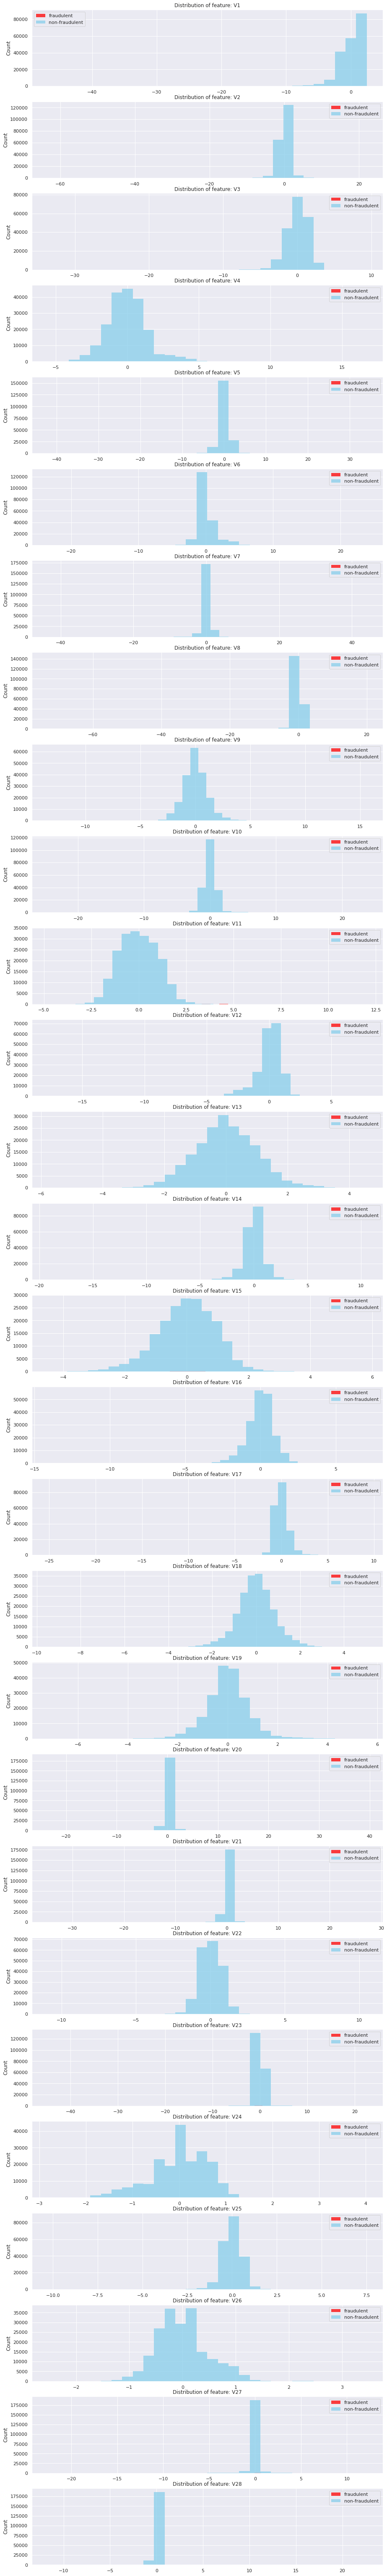

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], bins=30, color = 'red', lw=0)
    sns.histplot(X_train[feat][y_train==0], bins=30, color = 'skyblue', lw=0)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

> ***These graphs give us an idea of where the mean of each feature lies and how the data is pread for that feature. Knowing this, we can for example, expect an anomoly for feature V18 to lie on the interval less than -4 [units] or more than 4 [units] on the x-axis of that distribution. This is because we know the Guassian distribution tells us (based on its pdf formula) that the probablity of a non-fraudulent case to lie on those intervals is extremely low.***



## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  * Fit a Gaussian distribution on a feature of **the full training dataset** (this is unsupervised learning, we don't use the labels) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. **[1]**


>***By adjusting the starting index, ending index, and the step size for the loop, I refined the step size to find the optimal threshold. See the print statement at the last code block for this part.*** 




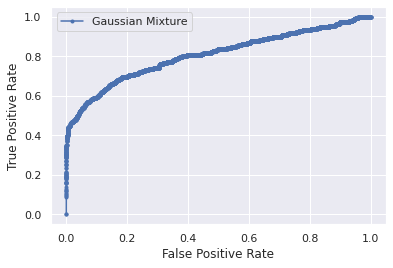

AUC of Gaussian Mixture for V18 is  0.80803


In [ ]:
# FIND AUC FOR FEATURE V18
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score


gm = GaussianMixture(n_components = 1)
train_set = np.array(X_train['V18']).reshape((-1,1))
gm.fit(train_set) # fit a Gaussian mixture model to the training V18 dataset

p_gm = gm.score_samples(train_set) # compute the score of the data
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print ("AUC of Gaussian Mixture for V18 is " ,\
       format(roc_auc_score(y_train, 1-p_gm), ".5f")  )



In [ ]:
# FIND THE BEST FEATURE TO IDENTIFY FRAUDULENT CASES BASED ON AUC
n = X_train.shape[1] # number of V features
AUC = np.empty(n) # store the AUC for each feature
res = pd.DataFrame(['AUC'], columns = ['item'])

for i in range(n):
    gm = GaussianMixture(n_components = 1)
    train_set = np.array(X_train[X_train.columns[i]]).reshape((-1,1))
    gm.fit(train_set) # fit a Gaussian mixture model to the training Vi dataset

    p_gm = gm.score_samples(train_set) # compute the score of the data
    fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
    AUC[i] = roc_auc_score(y_train, 1-p_gm)
    res.insert(len(res.columns), X_train.columns[i], AUC[i], True)

print("The best feature to distinguish the fraud cases with is",\
      X_train.columns[np.argmax(AUC)], "with an AUC of %.5f" %(np.amax(AUC)))
res

The best feature to distinguish the fraud cases with is V14 with an AUC of 0.95246


,item,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,AUC,0.705102,0.837499,0.876537,0.892103,0.771825,0.73438,0.862967,0.773238,0.802874,0.9136,0.897175,0.92018,0.572152,0.952459,0.514764,0.902137,0.934852,0.80803,0.741874,0.734692,0.833521,0.561287,0.696326,0.469229,0.574918,0.503272,0.835479,0.814201


In [ ]:
# FIND OPTIMAL THRESHOLD FOR BEST FEATURE BASED ON F1 SCORE
train_set = np.array(X_train[X_train.columns[np.argmax(AUC)]]).reshape((-1,1))
gm = GaussianMixture(n_components = 1)
gm.fit(train_set)

p_gm = gm.score_samples(train_set)

max_F1 = 0
max_i = 0

for i in range(300, 350, 1):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm <= mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    F1 = 2*precision*recall / (precision + recall)
    if F1 < max_F1:
        continue
    else:
        max_F1 = F1
        max_i = i

print("Optimal Threshold is at index ", max_i, "with an F1 value of ", max_F1)

Optimal Threshold is at index  309 with an F1 value of  0.6137404580152672


In [ ]:
mn_gm

-19.027867319453826

## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).

  * Fit a Gaussian distribution on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  Find an optimal threshold that maximizes the F1 Score in the training set. **[0.5]**
  *  Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance? **[0.5]**


> ***The resulting accuracy and F1 scores for best features to use in both GMM and SLGMM are quite close and the change in considering non-fraud data only doest not seem to change the performance of our model significantly. This could be due to the fact that the fraud cases are extremely rare in each feature dataset and have a very low probabality in the Gaussian model. The results may be different for a multivariate case, however.***




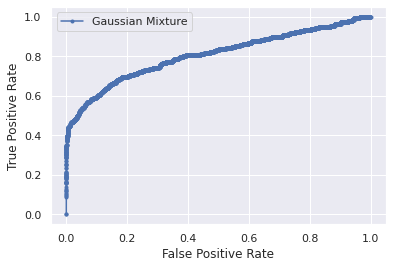

AUC of Gaussian Mixture for V18 is  0.80798


In [ ]:
# FIND AUC FOR A MODEL BASED ON NON-FRAUD FEATURE V18 DATA
X_train_nonfraud = X_train[y_train == 0]

train_set_nonfraud = np.array(X_train_nonfraud['V18']).reshape((-1,1))
train_set = np.array(X_train['V18']).reshape((-1,1))

gm = GaussianMixture(n_components = 1)
gm.fit(train_set_nonfraud)

p_gm = gm.score_samples(train_set) # compute the score of the data
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print ("AUC of Gaussian Mixture for V18 is " ,\
       format(roc_auc_score(y_train, 1-p_gm), ".5f")  )

In [ ]:
# FIND THE BEST FEATURE TO IDENTIFY FRAUDULENT CASES BASED ON NON-FRAUD MODEL
n = X_train.shape[1] # number of V features
AUC = np.empty(n) # store the AUC for each feature
res = pd.DataFrame(['AUC'], columns = ['item'])
X_train_nonfraud = X_train[y_train == 0]

for i in range(n):
    gm = GaussianMixture(n_components = 1)
    
    train_set_nonfraud = np.array(X_train_nonfraud[X_train.columns[i]]).reshape((-1,1))
    train_set = np.array(X_train[X_train.columns[i]]).reshape((-1,1))
    
    gm.fit(train_set_nonfraud) 

    p_gm = gm.score_samples(train_set)
    fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
    AUC[i] = roc_auc_score(y_train, 1-p_gm)
    res.insert(len(res.columns), X_train.columns[i], AUC[i], True)

print("The best feature to distinguish the fraud cases with is",\
      X_train.columns[np.argmax(AUC)], "with an AUC of %.5f" %(np.amax(AUC)))
res

The best feature to distinguish the fraud cases with is V14 with an AUC of 0.95260


,item,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,AUC,0.70535,0.838015,0.877392,0.892612,0.771881,0.734514,0.863167,0.773353,0.803263,0.913558,0.897612,0.920788,0.572142,0.952599,0.514781,0.902069,0.93444,0.80798,0.741989,0.734835,0.833878,0.561289,0.696345,0.469245,0.574931,0.503278,0.835538,0.814264


In [ ]:
# FIND OPTIMAL THRESHOLD FOR BEST FEATURE BASED ON F1 SCORE
train_set = np.array(X_train[X_train.columns[np.argmax(AUC)]]).reshape((-1,1))
train_set_nonfraud = np.array(X_train[X_train_nonfraud.columns[np.argmax(AUC)]]).reshape((-1,1))

gm = GaussianMixture(n_components = 1)
gm.fit(train_set_nonfraud)

p_gm = gm.score_samples(train_set)

max_F1 = 0
max_i = 0

for i in range(300, 350, 1):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm <= mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    F1 = 2*precision*recall / (precision + recall)
    if F1 < max_F1:
        continue
    else:
        max_F1 = F1
        max_i = i

print("Optimal Threshold is at index ", max_i, "with an F1 value of ", max_F1)

Optimal Threshold is at index  309 with an F1 value of  0.6137404580152672


## **Part 4: *Supervised,* Two Gaussians** -- Single feature model with two Gaussian distributions. [3 Marks]
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  *  Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Use the feature that lead to the best AUC in Part 3. **[0.5]**
  * Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively. **[0.5]**
  * Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). **[0.5]**
  * Repeat the steps above for at least two other features. **[1]**

In [ ]:
# FIT GAUSSIAN DISTRIBUTIONS FOR SINGLE FEATURE FRAUD AND NON-FRAUD CASES
X_train_nonfraud = X_train[y_train == 0]
X_train_fraud = X_train[y_train == 1]

train_set_nonfraud = np.array(X_train_nonfraud['V14']).reshape((-1,1))
train_set_fraud = np.array(X_train_fraud['V14']).reshape((-1,1))

g1 = GaussianMixture(n_components = 1)
g1.fit(train_set_nonfraud)

g2 = GaussianMixture(n_components = 1)
g2.fit(train_set_fraud)

# COMPUTE SCORE SAMPLES FOR G1 AND G2 ON THE ENTIRE TRAINING SET
train_set = np.array(X_train['V14']).reshape((-1,1))

s1 = g1.score_samples(train_set) 
s2 = g2.score_samples(train_set)


# FIND OPTIMAL C
max_F1 = 0
max_c = 0;

for c in range(10, 30, 1):
    precision = precision_score(y_train, s1 <= c*s2)
    recall = recall_score(y_train, s1 <= c*s2)
    F1 = 2*precision*recall / (precision + recall)

    if F1 < max_F1:
        continue
    else:
        max_F1 = F1
        max_c = c

print("By trial and error and sweeping through c,",\
      "the optimal c value to maximize F1 at %.2f" %(max_F1),\
      "is %i" %(max_c))

By trial and error and sweeping through c, the optimal c value to maximize F1 at 0.63 is 10


In [ ]:
# REPEAT FOR TWO OTHER VARIABLES
X_train_nonfraud = X_train[y_train == 0]
X_train_fraud = X_train[y_train == 1]
train_set_nonfraud = np.array(X_train_nonfraud['V5']).reshape((-1,1))
train_set_fraud = np.array(X_train_fraud['V5']).reshape((-1,1))
g1 = GaussianMixture(n_components = 1)
g1.fit(train_set_nonfraud)
g2 = GaussianMixture(n_components = 1)
g2.fit(train_set_fraud)


train_set = np.array(X_train['V5']).reshape((-1,1))
s1 = g1.score_samples(train_set) 
s2 = g2.score_samples(train_set)


max_F1 = 0
max_c = 0;

for c in range(0, 10, 1):
    precision = precision_score(y_train, s1 <= c*s2)
    recall = recall_score(y_train, s1 <= c*s2)
    F1 = 2*precision*recall / (precision + recall)

    if F1 < max_F1:
        continue
    else:
        max_F1 = F1
        max_c = c




In [ ]:
print("Feature V18: F1 = %.2f" %(max_F1),\
      ", Optimal C = %i" %(max_c))

Feature 18: F1 = 0.44 , Optimal C = 5


In [ ]:
print("Feature V5: F1 = %.2f" %(max_F1),\
      ", Optimal C = %i" %(max_c))

Feature V5: F1 = 0.19 , Optimal C = 8


## **Part 5: Multivariate and Mixture of Gaussians Distribution** [6 Marks]
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. **Make sure you have at least one model of each group**.
* You can use supervised and/or unsupervised methods. **Make sure you have at least one model of each group**.

It is up to you how to design your model. Try at least 12 different models and report the AUC and best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[6]**

**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [ ]:
# SUPERVISED FIT MODEL TO FIRST 10 FEATURES
train_set = np.array(X_train)
gm = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm.fit(train_set[0:10])


p_gm = gm.score_samples(train_set)


threshold= 0
max_F1 = 0
max_i = 0

for i in range(300, 400, 1):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm <= mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    F1 = 2*precision*recall / (precision + recall)
    if F1 < max_F1:
        continue
    else:
        threshold = mn_gm
        max_F1 = F1
        max_i = i

print(F1)
print(max_i)
print(threshold)

p_gm = gm.score_samples(train_set)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
AUC = roc_auc_score(y_train, 1-p_gm)
print("AUC = ", AUC)

0.22013422818791947
300
-537328572.1061492
AUC =  0.9488962345813462


In [ ]:
# SUPERVISED NON-FRAUD CASES for up to n cases

train_set_nonfraud = np.array(X_train[y_train == 0])
gm = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm.fit(train_set[0:10])


p_gm = gm.score_samples(train_set)


threshold= 0
max_F1 = 0
max_i = 0

for i in range(300, 400, 1):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm <= mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    F1 = 2*precision*recall / (precision + recall)
    if F1 < max_F1:
        continue
    else:
        threshold = mn_gm
        max_F1 = F1
        max_i = i

print("F1 = ", F1)
print("Max index = ", max_i)
print("Threshold = ", threshold)


p_gm = gm.score_samples(train_set)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
AUC = roc_auc_score(y_train, 1-p_gm)
print("AUC = ", AUC)

F1 =  0.22013422818791947
Max index =  300
Threshold =  -537328572.1061492
AUC =  0.9488962345813462


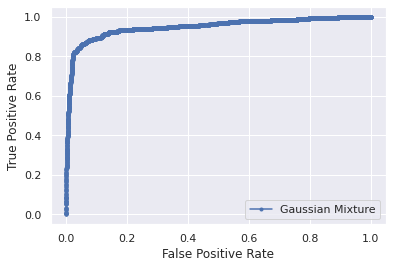

AUC of Gaussian Mixture for V18 is  0.94890


In [ ]:
# UNSUPERVISED FIT MODEL TO FIRST 10 FEATURES
train_set = np.array(X_train)
gm = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm.fit(train_set[0:10])

p_gm = gm.score_samples(train_set) # compute the score of the data
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print ("AUC of Gaussian Mixture for V18 is " ,\
       format(roc_auc_score(y_train, 1-p_gm), ".5f")  )

## **Part 6: Evaluating performance on test set:** [1 Mark]
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [ ]:
#  SUPERVISED FIT MODEL WITH FIRST 10 FEATURES

train_set = np.array(X_train)
gm = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm.fit(train_set[0:10])


p_gm = gm.score_samples(train_set)


threshold= 0
max_F1 = 0
max_i = 0

for i in range(300, 400, 1):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm <= mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    F1 = 2*precision*recall / (precision + recall)
    if F1 < max_F1:
        continue
    else:
        threshold = mn_gm
        max_F1 = F1
        max_i = i

In [ ]:
# APPLY TO TEST SET

p_gm = gm.score_samples(X_test)

precision = precision_score(y_test, p_gm <= threshold)
recall = recall_score(y_test, p_gm < threshold)
F1 = 2*precision*recall / (precision + recall)
print("F1 = ", F1)

F1 =  0.24242424242424243
